# 1. Đọc dữ và trực quan hóa dữ liệu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/data.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [3]:
df.isnull().sum().sum()

np.int64(0)

--> Không có mẫu nào bị thiếu

## 1.1 Loại bỏ các cột không được chú thích trong phần giới thiệu của data trên Kaggle

In [4]:
columns = [
    "Age",
    "Gender",
    "Weight (kg)",
    "Height (m)",
    "Max_BPM",
    "Avg_BPM",
    "Resting_BPM",
    "Session_Duration (hours)",
    "Calories_Burned",
    "Workout_Type",
    "Fat_Percentage",
    "Water_Intake (liters)",
    "Workout_Frequency (days/week)",
    "Experience_Level",
    "BMI",
    "Daily meals frequency",
    "Physical exercise",
    "Carbs",
    "Proteins",
    "Fats",
    "Calories",
    "meal_name",
    "meal_type",
    "diet_type",
    "sugar_g",
    "sodium_mg",
    "cholesterol_mg",
    "serving_size_g",
    "cooking_method",
    "prep_time_min",
    "cook_time_min",
    "rating",
    "Name of Exercise",
    "Sets",
    "Reps",
    "Benefit",
    "Burns Calories (per 30 min)",
    "Target Muscle Group",
    "Equipment Needed",
    "Difficulty Level",
    "Body Part",
    "Type of Muscle",
    "Workout"
]

print(len(columns))

df = df[columns]

43


## 1.2 Chọn cột 'Fat_Percentage' làm cột đích để xây dựng mô hình dự đoán 

In [5]:
X = df.drop(columns='Fat_Percentage')
y = df['Fat_Percentage']

# 2. Trực quan hóa dữ liệu


## 2.1 Quan sát ngoại lệ (outliers)
Ở bước này, chúng tôi chưa xử lý dữ liệu, chỉ quan sát và phân tích. Dữ liệu sẽ được xử lý khi chuẩn bị đầu vào cho model.


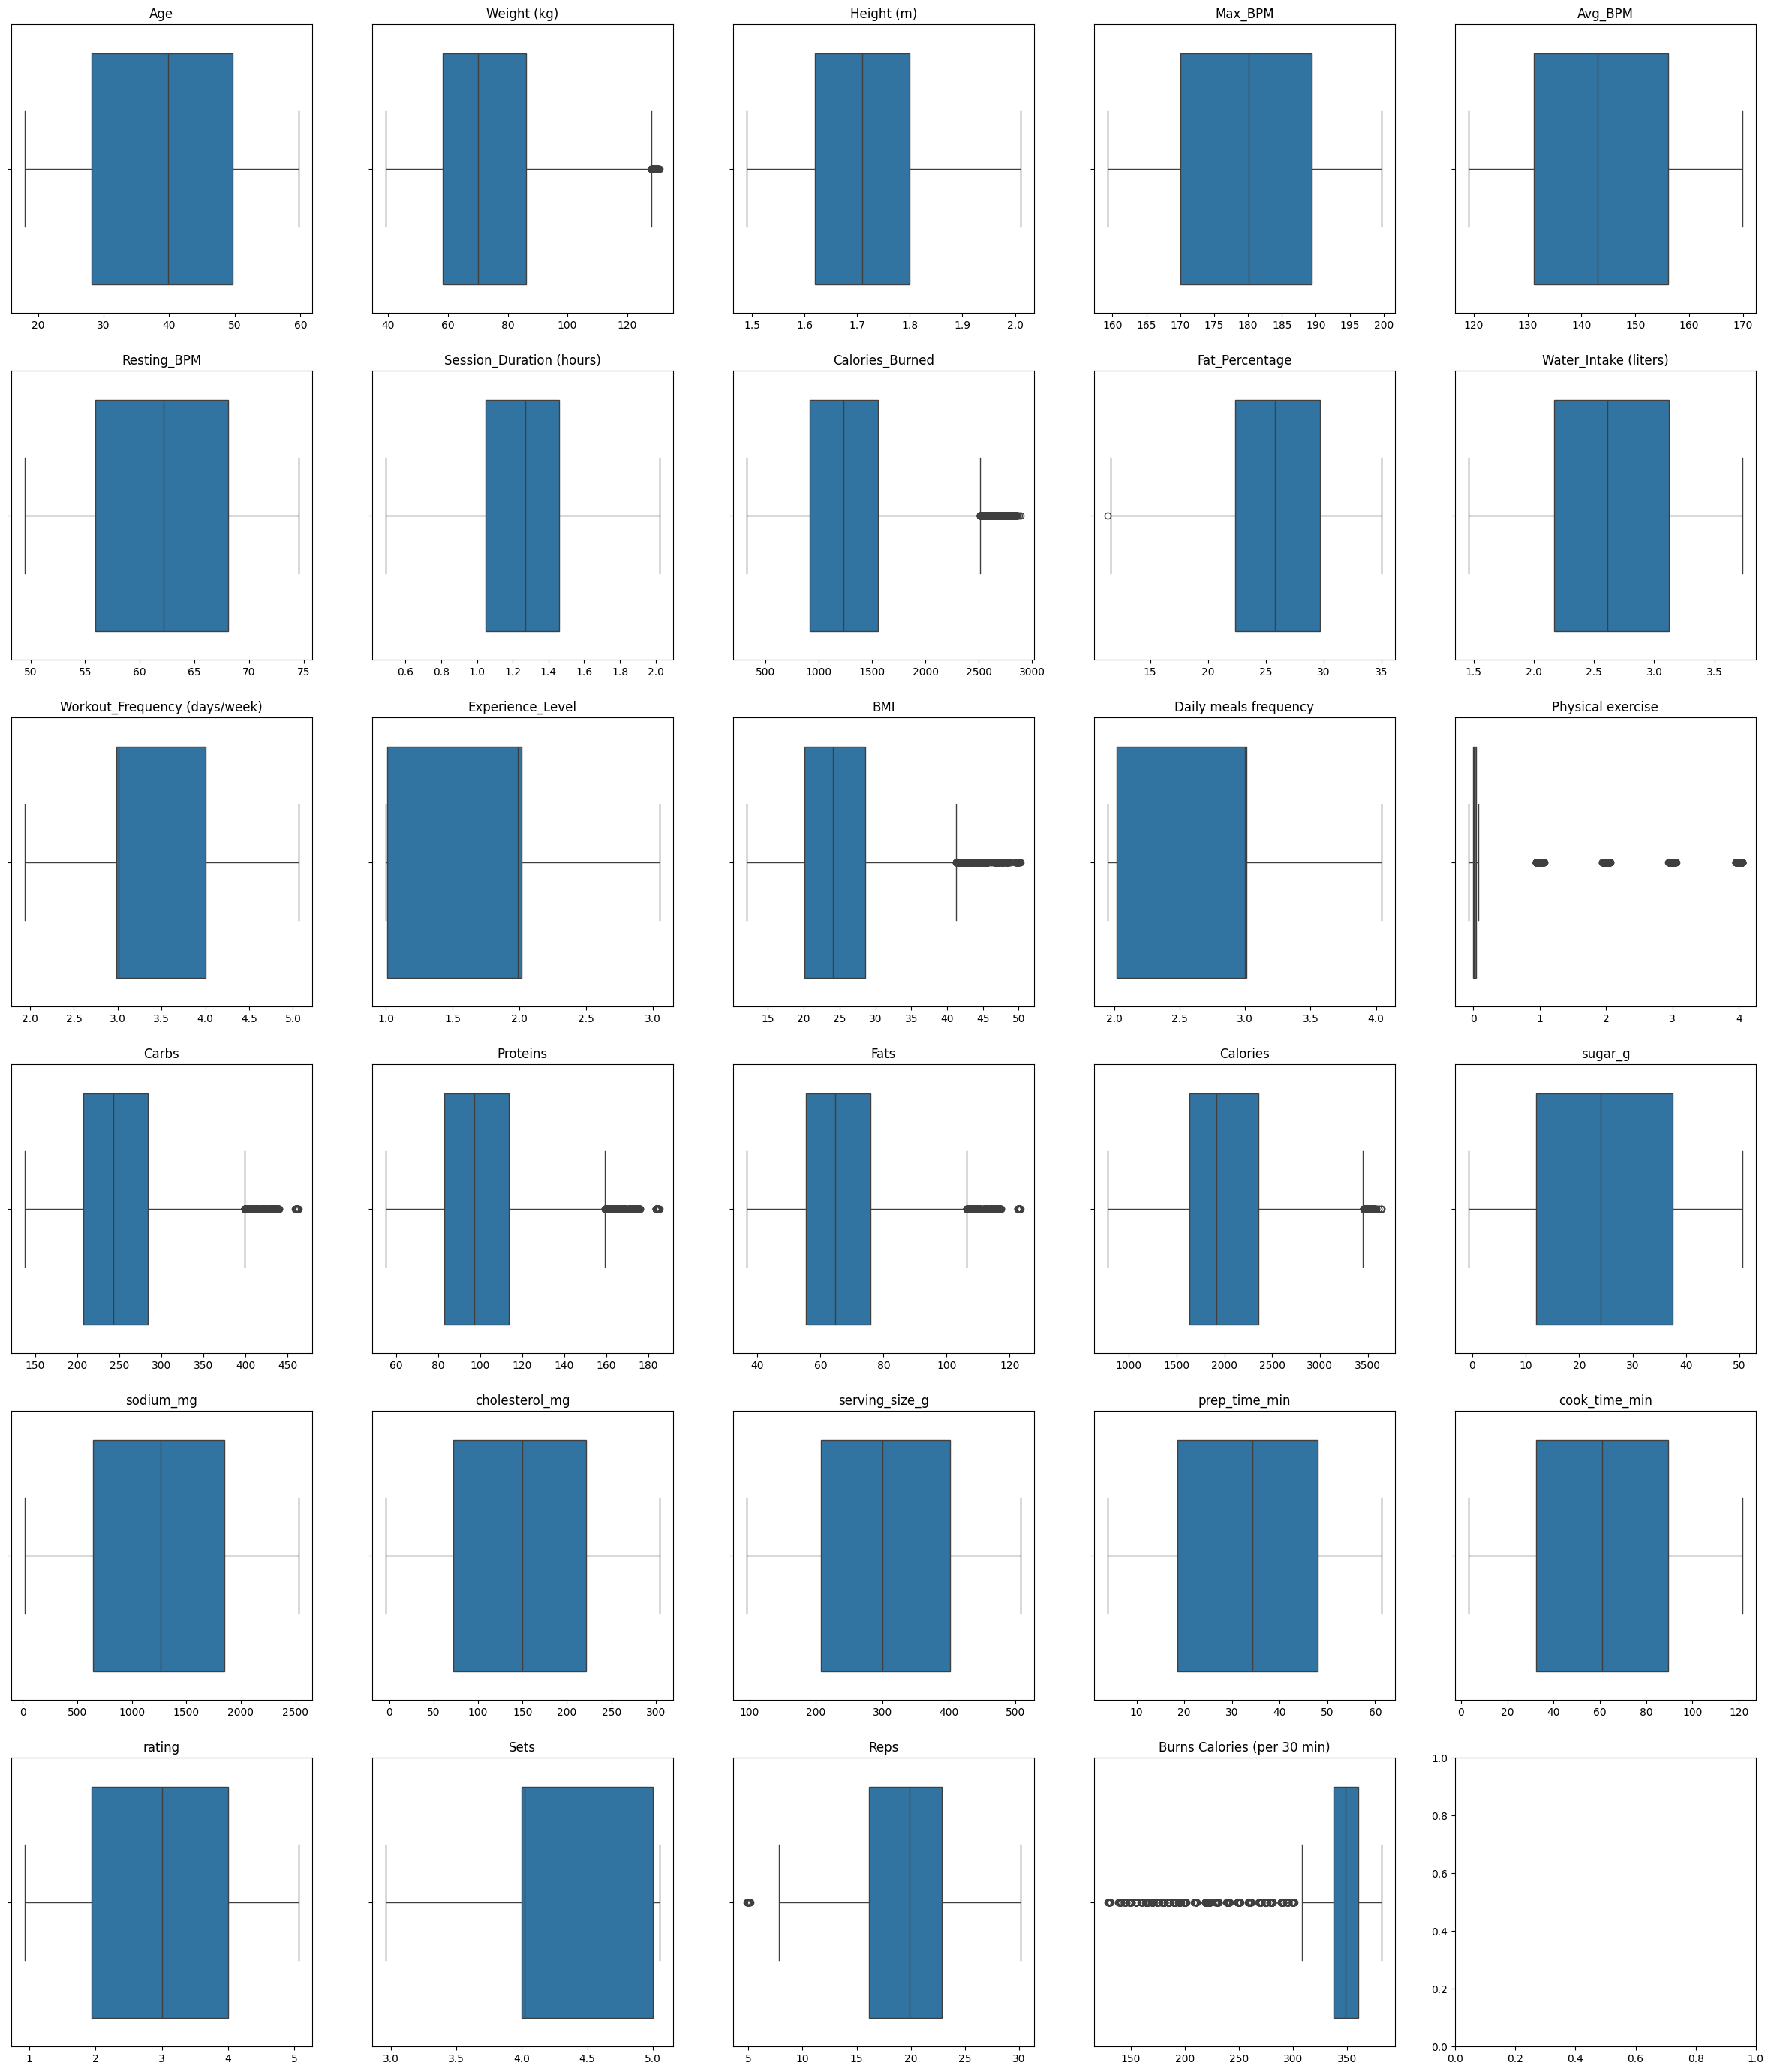

In [6]:

X_num = df.select_dtypes(include=[np.number])
num_cols = X_num.columns
fig, ax = plt.subplots(6,5, figsize=(30, 35))

for i in range(6):
    for j in range(5):
        col = i*5 + j if i*5+j < len(num_cols) else "#end#"
        if col == "#end#":
            break
        else:
            col = num_cols[col]
        sns.boxplot(x=df[col], ax=ax[i,j])
        ax[i,j].set_title(col)
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel('')

plt.show()

Có một vài cột có rất nhiều giá trị outliers, như là `Burns Calories (per 30 min)`, `BMI`, `Physical exercise`, `Carbs`, `Protein` và `Calories Burned`. Riêng các `Burns Calories (per 30 min)` và `Physical exercise` có một số giá trị cực kỳ cao, outlier kéo giãn khoảng giá trị của các cột này rất mạnh.

Các cột `Sets`, `Workout Frequency (days/week)`, `Experience_level` và `Daily meals frequency`, tuy không có outlier nhưng lại bị lệch nhẹ về trái hoặc phải.

Các cột còn lại có phân phối khá đẹp, có thể gọi là gần chuẩn.

In [7]:
total_outliers = 0
for col in X_num.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    top = Q3 + 1.5 * IQR
    bottom = Q1 - 1.5 * IQR
    outliers = df[(df[col] < bottom) | (df[col] > top)]
    if len(outliers) > 0:
        print(col, ": ", len(outliers), " outliers")
        total_outliers += len(outliers) 

print()
print("Total outliers: ", total_outliers)
print("num_outliers/num_data: ", total_outliers/len(df))

Weight (kg) :  152  outliers
Calories_Burned :  507  outliers
Fat_Percentage :  1  outliers
BMI :  530  outliers
Physical exercise :  4695  outliers
Carbs :  405  outliers
Proteins :  403  outliers
Fats :  399  outliers
Calories :  102  outliers
Reps :  42  outliers
Burns Calories (per 30 min) :  893  outliers

Total outliers:  8129
num_outliers/num_data:  0.40645


 Do lượng outliers khá lớn, nên không thể loại bỏ. Thay vào đó chúng tôi sử dụng phương pháp Capping, tức là thay các giá trị outliers bằng các giá trị top và bottom được tính bằng công thức:

`Top = Q3 + 1.5 * IQR` \
`Bottom = Q1 - 1.5 * IQR` 

Trong đó Q1, Q3 là giá trị phần tử thứ 25% và 75% trong tập dữ liệu, còn IQR là giá trị trung vị của tập dữ liệu.

## 2.2 Phân phối của cột đích (Fat_Percentage)

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_13584\4159599855.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


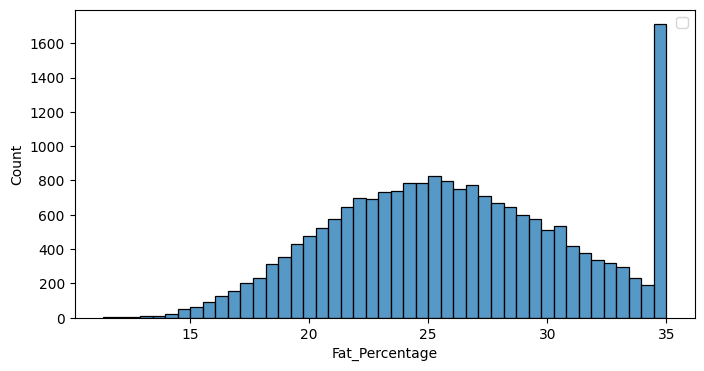

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(data=y)
plt.legend()
plt.show()

--> Phân phối của cột 'Fat_Percentage' tương đối chuẩn, nhưng ở cuối phân phối lại có 1 giá trị cao bất thường. Điều này sẽ ảnh hưởng đến khả năng học của mô hình.

## 2.3 Phân tích các biến

In [9]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
X_num = X.select_dtypes(include=[np.number])
X_cate = X.select_dtypes(exclude=[np.number])

print(f"Total features: {X.shape[1]}")
print(f"Total numeric features: {X_num.shape[1]}")
print(f"Total categorical features: {X_cate.shape[1]}")

# for i, x in enumerate(X_num.columns):
#     r, p = pearsonr(X[x], y)
#     print(f"{i + 1} . {x} (r : {r}, p : {p})")
    # sp, p = spearmanr(X[x], y)

Total features: 42
Total numeric features: 28
Total categorical features: 14


### 2.3.1 Phân phối các biến numeric

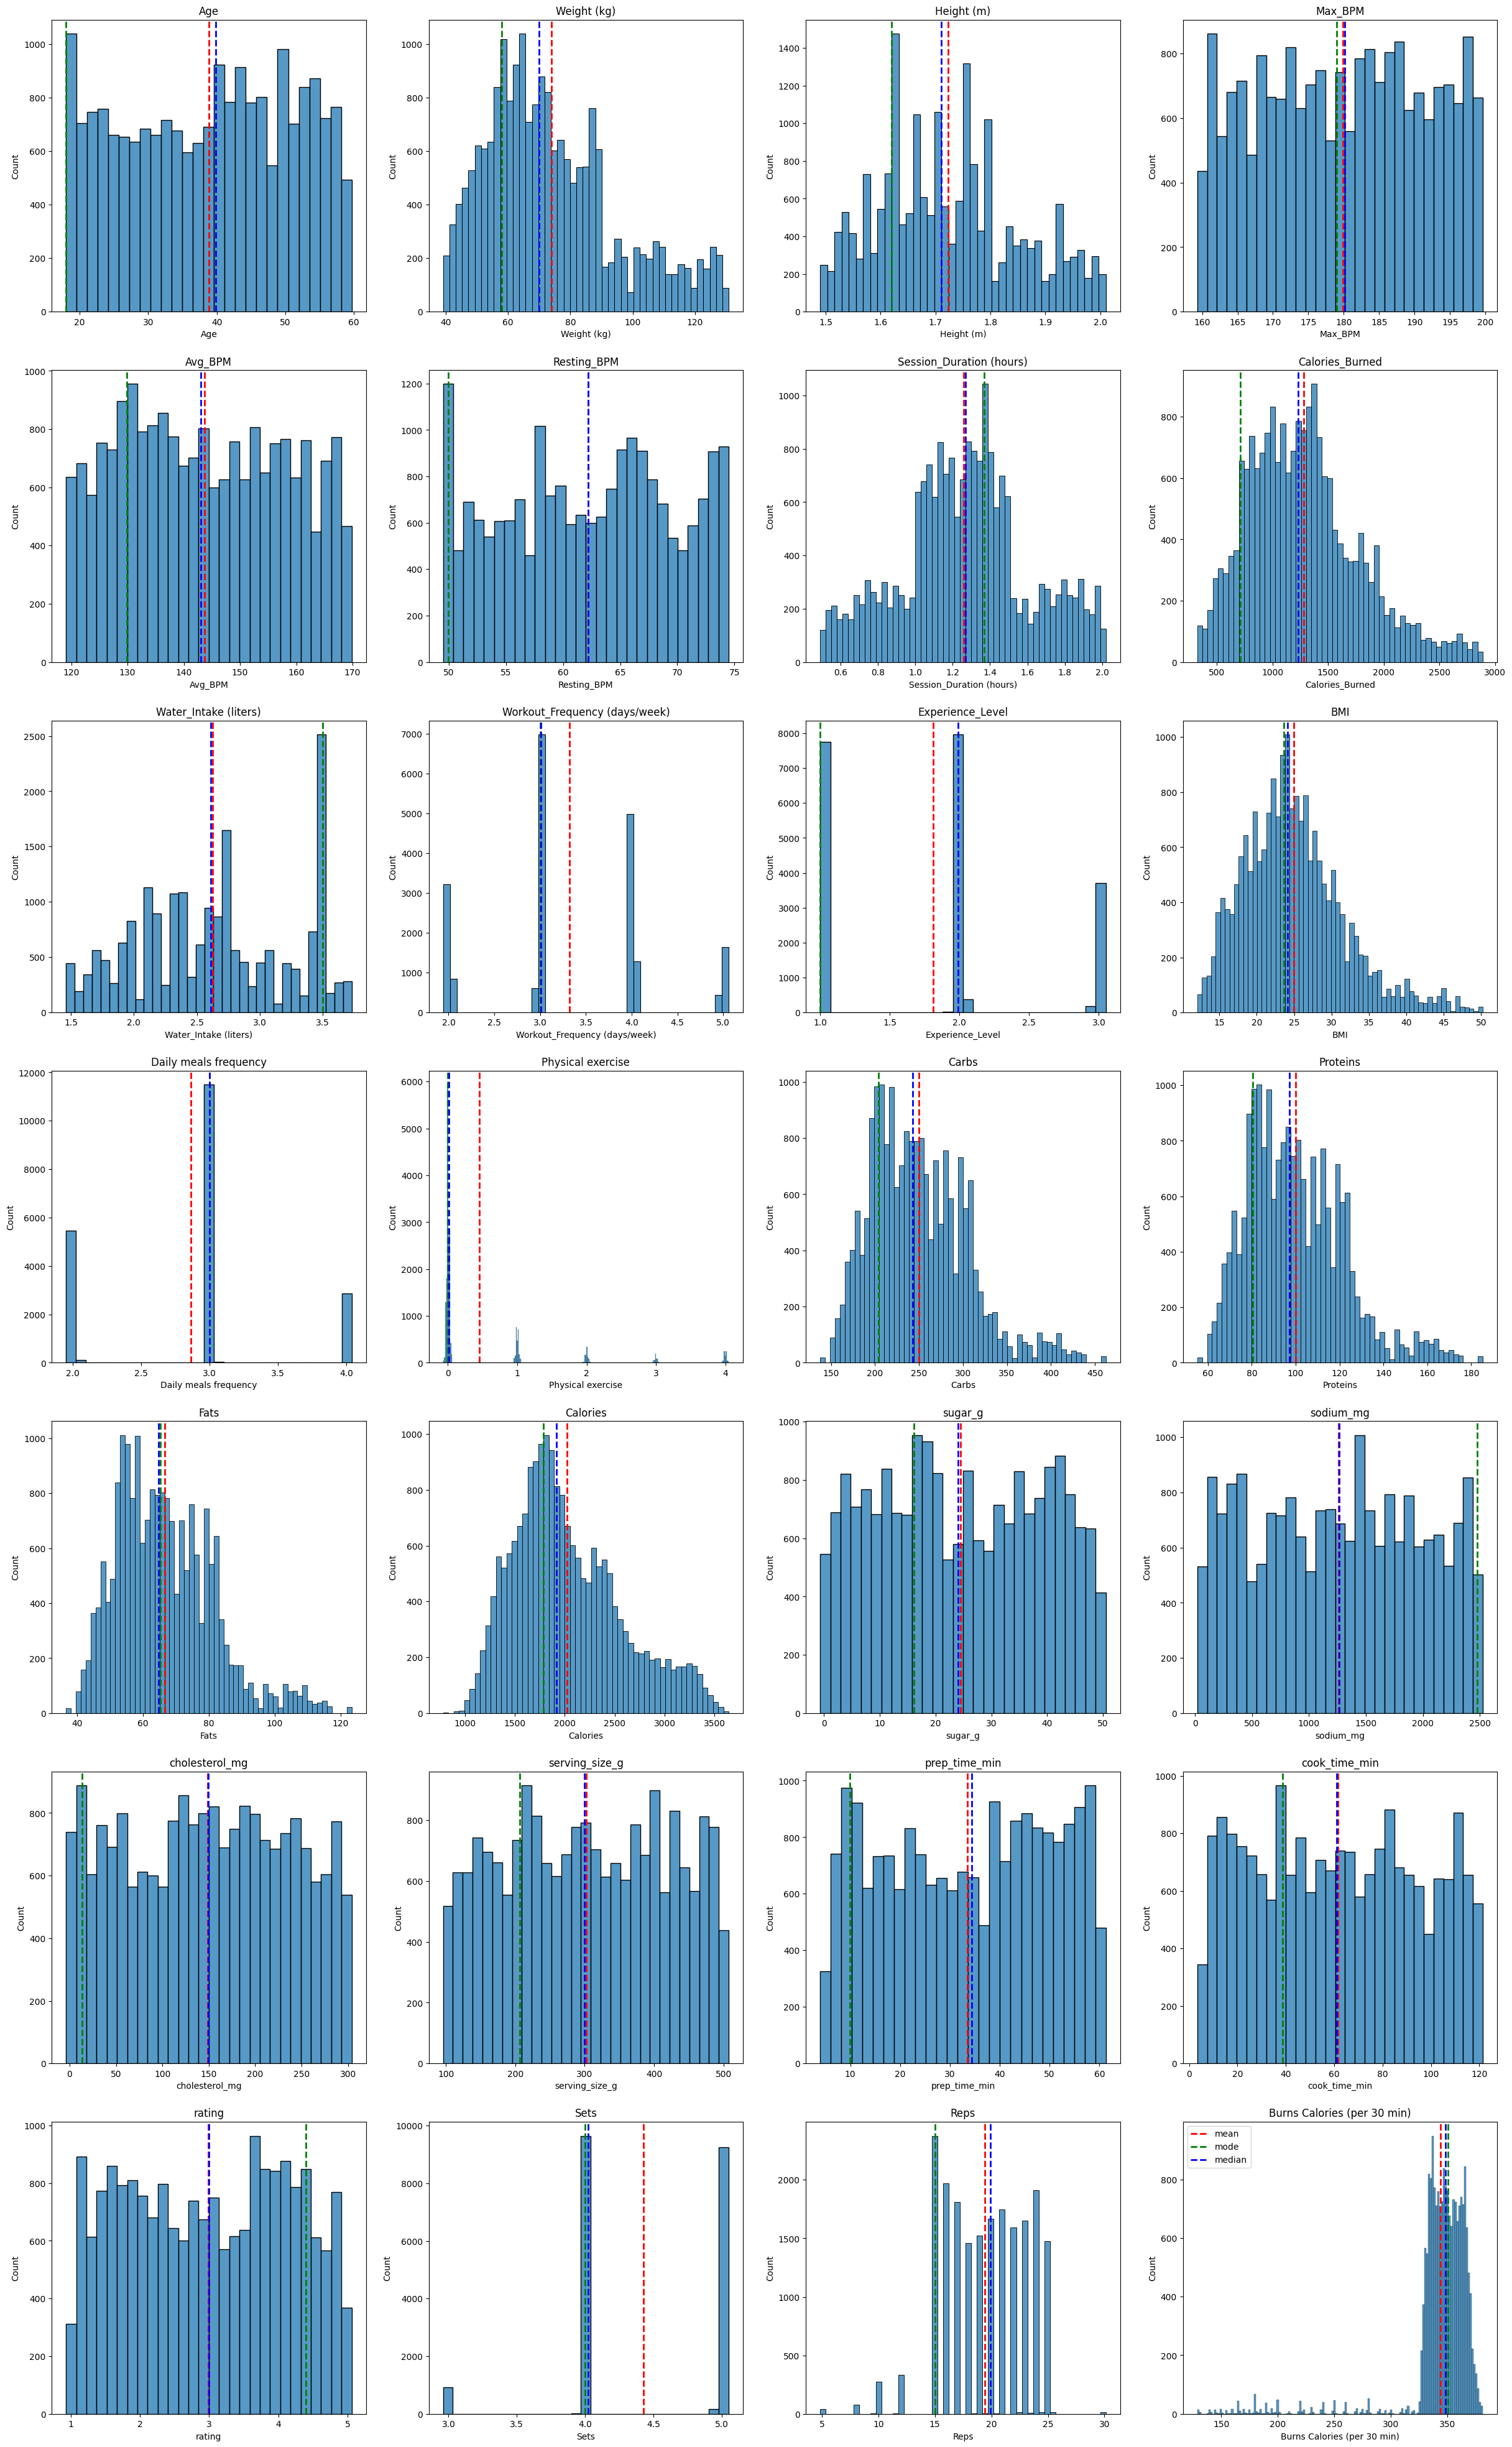

In [10]:
fig, axs = plt.subplots(7, 4, figsize=(30, 50))

num_cols = X_num.columns
for i in range(7):
    for j in range(4):
        col = num_cols[4*i + j]
        sns.histplot(data=X_num[col], ax=axs[i, j])
        axs[i, j].set_title(col)

        mean = X_num[col].mean()
        mode = X_num[col].mode()[0]
        median = X_num[col].median()

        axs[i, j].axvline(x=mean, linestyle='--', color='r', label='mean', linewidth=2)
        axs[i, j].axvline(x=mode, linestyle='--', color='g', label='mode', linewidth=2)
        axs[i, j].axvline(x=median, linestyle='--', color='b', label='median', linewidth=2)

plt.legend()
plt.show()

Nhìn chung, đa số các biến đều không có phân phối chuẩn, chỉ có gần chuẩn hoặc gần đều. Một số biến rất rời rạc, gần như loại categorical features. Một số biến như: Carbs, Protein, BMI có phân phối gần chuẩn, nhưng số lượng giá trị ở đuôi lại rất cao, phân phối giống như biến đích (Fat_Percentage)

#### Xác định độ lệch của phân phối của các biến numerical

In [11]:
for col in X_num.columns:
    mean = X_num[col].mean()
    mode = X_num[col].mode()[0]
    median = X_num[col].median()
    max = X_num[col].max()
    min = X_num[col].min()

    skewness = X_num[col].skew()
    if abs(skewness) > 1:
        status = "⚠️  Skewed"
    else:
        status = "✅ Balanced"
    print(f"{col:35s}  Skewness: {skewness:6.2f}   → {status}")



Age                                  Skewness:  -0.09   → ✅ Balanced
Weight (kg)                          Skewness:   0.77   → ✅ Balanced
Height (m)                           Skewness:   0.33   → ✅ Balanced
Max_BPM                              Skewness:  -0.03   → ✅ Balanced
Avg_BPM                              Skewness:   0.09   → ✅ Balanced
Resting_BPM                          Skewness:  -0.06   → ✅ Balanced
Session_Duration (hours)             Skewness:   0.02   → ✅ Balanced
Calories_Burned                      Skewness:   0.68   → ✅ Balanced
Water_Intake (liters)                Skewness:   0.06   → ✅ Balanced
Workout_Frequency (days/week)        Skewness:   0.15   → ✅ Balanced
Experience_Level                     Skewness:   0.33   → ✅ Balanced
BMI                                  Skewness:   0.79   → ✅ Balanced
Daily meals frequency                Skewness:   0.12   → ✅ Balanced
Physical exercise                    Skewness:   2.42   → ⚠️  Skewed
Carbs                             

### 2.3.2 Phân phối các biến categorical

Index(['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type',
       'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout'],
      dtype='object')


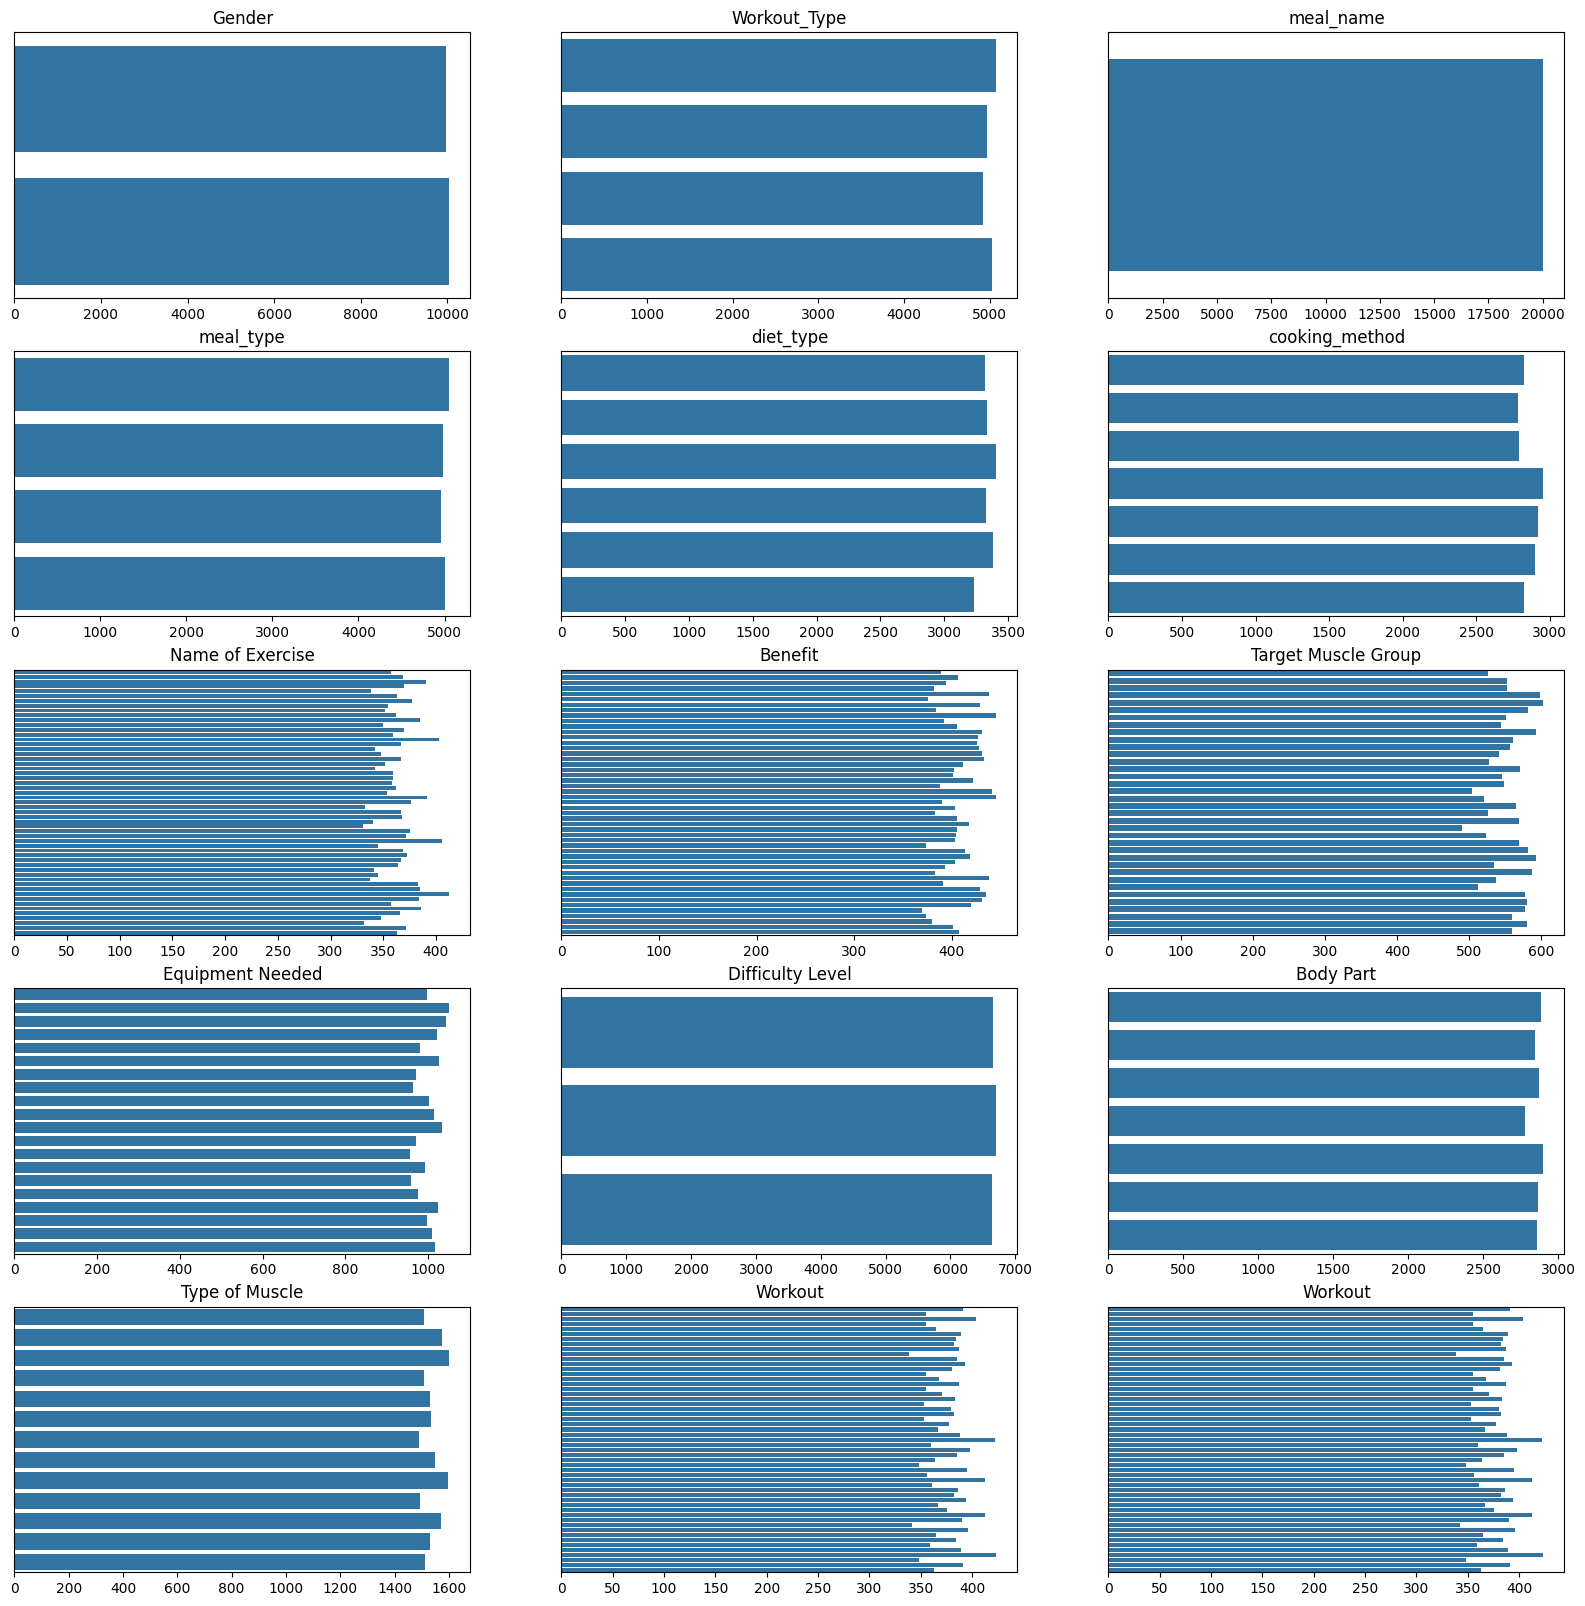

In [12]:
cate_cols = X_cate.columns
print(cate_cols)

fig, axs = plt.subplots(5,3, figsize=(20,20))
for i in range(5):
    for j in range(3):
        col = cate_cols[i*3+j if i*3+j < len(cate_cols) else i*3+j-5*3]
        # sns.histplot(X_cate[col], ax=axs[i,j])
        sns.countplot(X_cate[col], ax=axs[i,j])
        axs[i,j].set_title(col)
        axs[i,j].set_yticks([])
        axs[i,j].set_ylabel('')
        axs[i,j].set_xlabel('')
plt.show()

Ngược lại với các biến numeric, các biến categorical có phân phối khá đồng đều. Với các biến có ít giá trị, số lượng mẫu ở mỗi giá trị hầu như không khác biệt. Đặc biệt, cột 'meal_name' (hàng 1 cột 3) chỉ có 1 giá trị duy nhất, nên ta có thể loại bỏ cột này vì nó không ảnh hưởng gì đến biến đích.

In [13]:
def check_categorical_balance(df, threshold=0.2):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    
    print("📊 Categorical Columns Balance Report:\n" + "="*40)
    
    for col in categorical_cols:
        counts = df[col].value_counts(normalize=True)
        imbalance = (counts.max() - counts.min()) > threshold
        
        print(f"\n🧩 {col}")
        print(counts.head(10))
        if imbalance:
            print("⚠️  Imbalanced (some categories dominate)")
        else:
            print("✅ Balanced")

check_categorical_balance(X_cate)

📊 Categorical Columns Balance Report:

🧩 Gender
Gender
Female    0.5014
Male      0.4986
Name: proportion, dtype: float64
✅ Balanced

🧩 Workout_Type
Workout_Type
Strength    0.25355
Yoga        0.25160
HIIT        0.24870
Cardio      0.24615
Name: proportion, dtype: float64
✅ Balanced

🧩 meal_name
meal_name
Other    1.0
Name: proportion, dtype: float64
✅ Balanced

🧩 meal_type
meal_type
Lunch        0.25235
Dinner       0.25055
Breakfast    0.24905
Snack        0.24805
Name: proportion, dtype: float64
✅ Balanced

🧩 diet_type
diet_type
Paleo         0.17015
Low-Carb      0.16895
Vegetarian    0.16685
Keto          0.16620
Vegan         0.16615
Balanced      0.16170
Name: proportion, dtype: float64
✅ Balanced

🧩 cooking_method
cooking_method
Baked      0.14765
Steamed    0.14605
Raw        0.14495
Grilled    0.14135
Roasted    0.14120
Boiled     0.13945
Fried      0.13935
Name: proportion, dtype: float64
✅ Balanced

🧩 Name of Exercise
Name of Exercise
Flutter Kicks             0.02060
Dea

- Cách tính trên tham khảo từ note book của tác giả của bộ data, được đăng trên [kaggle](https://www.kaggle.com/code/jockeroika/life-style-analysis#Check-Balance-of-Categorical-Features) nên nhóm sẽ không thay đổi threshold.

- Kết quả từ cách tính trên cũng có thể nhận thấy bằng mắt thường khi quan sát phân phối của các cột categorical.

### 2.3.3 Correlation của các biến numeric với target
Do các biến numeric có nhiều ngoại lai, và không theo thứ tự nên trước hết ta sẽ loại bỏ ngoại lai và áp dụng Pearson correlation. Thêm vào đó cần scale khoảng giá trị của các biến về cùng 1 khoảng để dễ dàng so sánh.

In [14]:
def remove_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    top = Q3 + 1.5 * IQR
    bottom = Q1 - 1.5 * IQR

    col_new = []
    for c in col:
        if c >= bottom and c <= top:
            col_new.append(c)
        elif c < bottom:
            col_new.append(bottom)
        elif c > top:
            col_new.append(top)

    col_new = pd.Series(col_new)
    # col.clip(lower=bottom, upper=top)
    return col_new

X_num = X_num.apply(remove_outliers)

In [15]:
# from scipy.stats import spearmanr
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_num_scaled = scaler.fit_transform(X_num)

# X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)
# X_num_scaled['Target'] = y
# print(X_num_scaled.shape)

# r_matrix, p_matrix = spearmanr(X_num_scaled, axis=0)

# r_matrix = pd.DataFrame(r_matrix, columns=X_num_scaled.columns, index=X_num_scaled.columns)
# p_matrix = pd.DataFrame(p_matrix, columns=X_num_scaled.columns, index=X_num_scaled.columns)

# fig, ax = plt.subplots(1, 2, figsize=(25, 10))
# sns.heatmap(
#     r_matrix,
#     # annot=True,        # hiện giá trị r trên ô
#     fmt=".2f",
#     vmin=-1, vmax=1,   # chuẩn hóa thang màu cho tương quan
#     cmap="coolwarm",
#     ax=ax[0]
# )
# ax[0].set_title("Spearman correlation (r)")

# sns.heatmap(
#     p_matrix,
#     # annot=True,        # hiện p-value
#     fmt=".3f",
#     vmin=0, vmax=1,
#     cmap="viridis",
#     ax=ax[1]
# )
# ax[1].set_title("Spearman correlation p-values")
# plt.show()

In [16]:
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

# Bỏ scale trước khi tính corr
# scaler = StandardScaler() 
# # X_num_scaled = scaler.fit_transform(X_num)

X_num = pd.DataFrame(X_num, columns=X_num.columns)

X_num_col = X_num.columns
r_df = pd.DataFrame(columns=X_num_col)
p_df = pd.DataFrame(columns=X_num_col)
for i, x in enumerate(X_num_col):
    r, p = pearsonr(X_num[x], y)
    r_df.loc[0, x] = r
    p_df.loc[0, x] = p


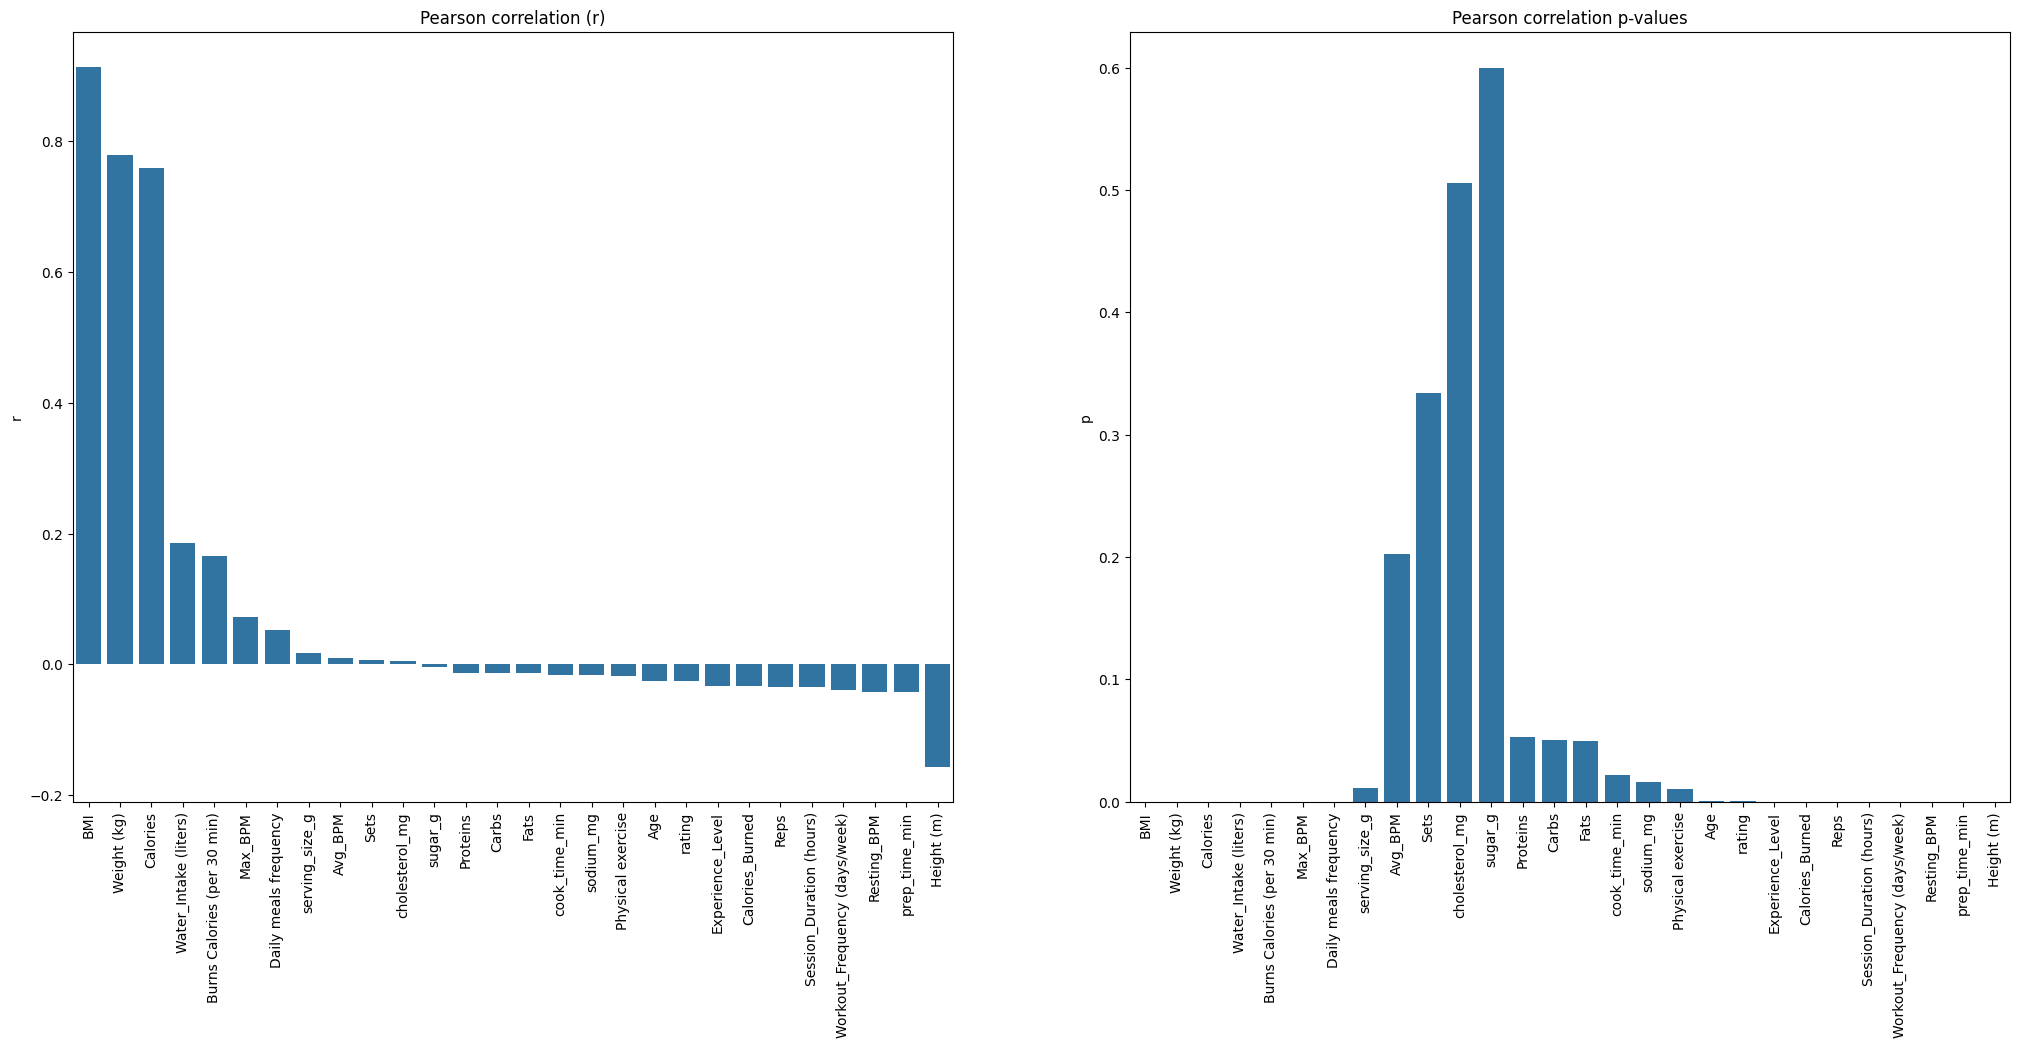

In [17]:
df_plot = pd.DataFrame({
    'r': r_df.iloc[0],
    'p': p_df.iloc[0]
})

df_plot.sort_values(by='r', ascending=False, inplace=True)
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
sns.barplot(data=df_plot['r'], ax=ax[0])
ax[0].set_title("Pearson correlation (r)")
ax[0].tick_params(axis='x', rotation=90)


sns.barplot(data=df_plot['p'], ax=ax[1])
ax[1].set_title("Pearson correlation p-values")
ax[1].tick_params(axis='x', rotation=90)
plt.show()


Ta thấy các cột có tương quan dương mạnh với biến target là `BMI`, `Weight (kg)` và `Calories`, đồng thời **p_values** của các cột này đều nhỏ hơn 0.05, cho thấy giá trị r này có ý nghĩa thống kê. 

Ngoài ra, các biến `Height (m)`, `Burns Calories (per 30 min)` và `Water_Intake (liters)` cũng có tương quan với biến target, nhưng yếu hơn khi $|r| < 0.2$ và $p < 0.05$, nên vẫn có ý nghĩa thống kê.

Có thể đưa 6 biến này để làm đầu vào cho model.

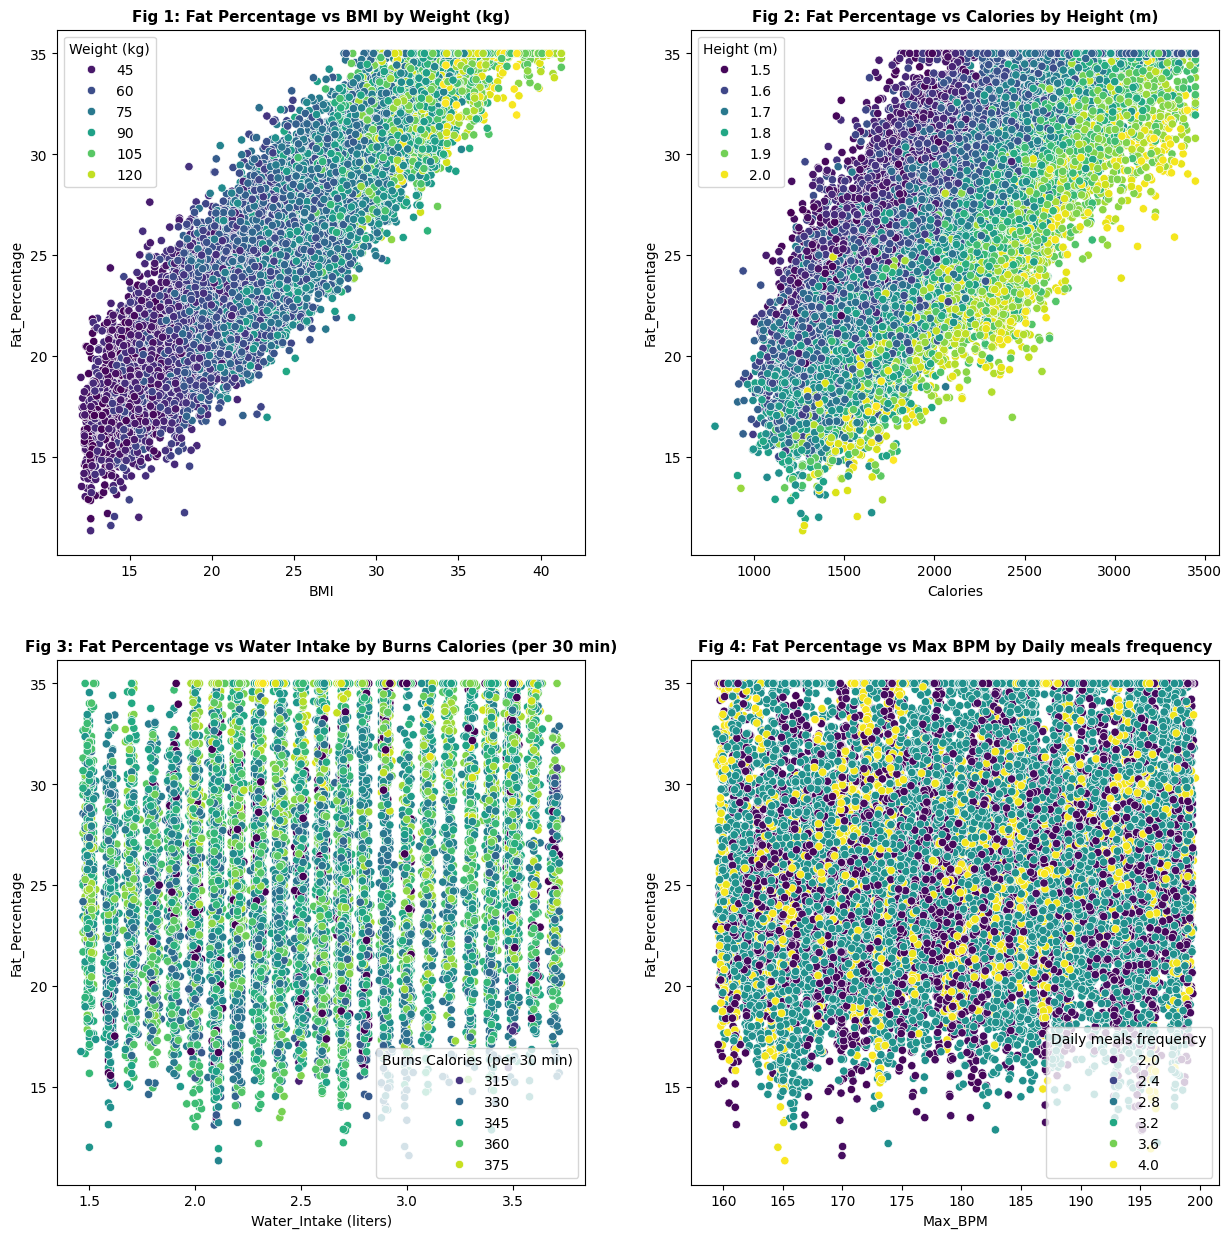

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
sns.scatterplot(x=X_num['BMI'], y=y, hue=X_num['Weight (kg)'], palette='viridis', ax=ax[0, 0])
sns.scatterplot(x=X_num['Calories'], y=y, hue=X_num['Height (m)'], palette='viridis', ax=ax[0, 1])
sns.scatterplot(x=X_num['Water_Intake (liters)'], y=y, hue=X_num['Burns Calories (per 30 min)'], palette='viridis', ax=ax[1, 0])
sns.scatterplot(x=X_num['Max_BPM'], y=y, hue=X_num['Daily meals frequency'], palette='viridis', ax=ax[1, 1])

ax[0, 0].set_title('Fig 1: Fat Percentage vs BMI by Weight (kg)', fontsize=11, fontweight='bold')
ax[0, 1].set_title('Fig 2: Fat Percentage vs Calories by Height (m)', fontsize=11, fontweight='bold')
ax[1, 0].set_title('Fig 3: Fat Percentage vs Water Intake by Burns Calories (per 30 min)', fontsize=11, fontweight='bold')
ax[1, 1].set_title('Fig 4: Fat Percentage vs Max BPM by Daily meals frequency', fontsize=11, fontweight='bold')
plt.show()

- Ta thấy ở Fig 1, biến `Fat Percentage` có quan hệ đồng biến với `BMI` và `Weight (kg)` . Khi `BMI` hoặc `Weight (kg)` càng cao thì `Fat Percentage` càng cao, và ngược lại.

- Ở Fig 2, biến `Fat Percentage` có quan hệ đồng biến với `Calories`, nhưng lại có quan hệ nghịch biến với `Height (cm)`.  Khi `Fat Percentage` giảm thì `Height (m)` tăng, `Calories` giảm, và ngược lại.

- Ở Fig 3, ta thấy `Fat Percentage` không còn có tương quan rõ ràng với biến `Water_Intake (liters)` do phân bố dữ liệu đồng đều, trải đều trên plot. Đối với biến `Burns Calories (per 30 min)` thì ta thấy khi `Fat Percentage` tăng hoặc giảm thì đều có các giá trị `Burns Calories (per 30 min)`  cao và thấp, chứng tỏ 2 biến này không có tương quan rõ ràng. 

- Fig 4 thể hiện điều tương tự như Fig 3, cả 2 biến `Max_BPM` và `Daily meals frequency` không còn có tương quan rõ ràng với `Fat Percentage`, các điểm dữ liệu phân bố đều trên plot.

- Điều này là hợp lý với **r values** khi tính độ tương quan giữa `Fat Percentage` và `BMI`, `Weight (kg)`, `Calories`, `Height (cm)`, `Water_Intake (liters)`, `Burns Calories (per 30 min)`, `Max_BPM`, `Daily meals frequency`. Các biến khác có **r values** còn thấp hơn `Daily meals frequency` nên chúng sẽ không có ảnh hưởng đến `Fat Percentage`.
 


### 2.3.4 Ảnh hưởng của các biến Categorical đến Target

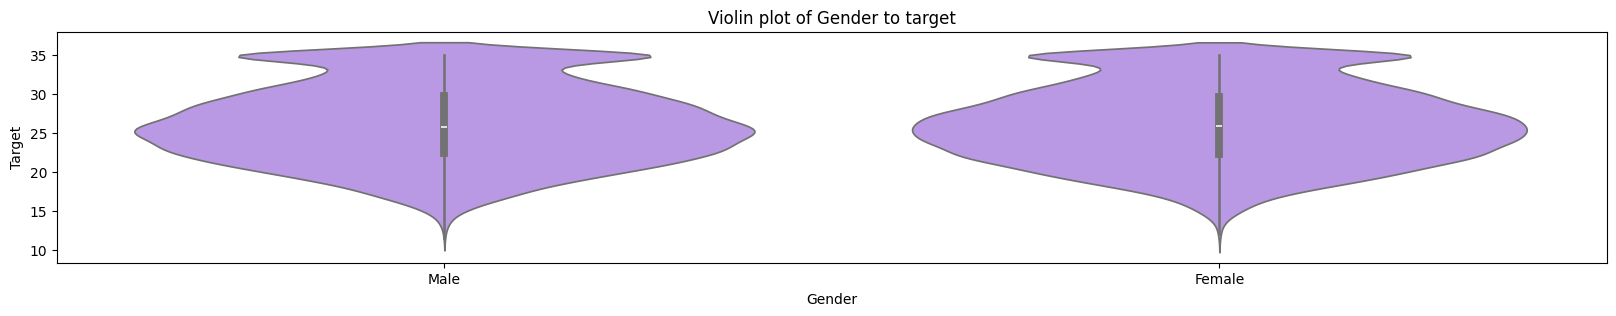

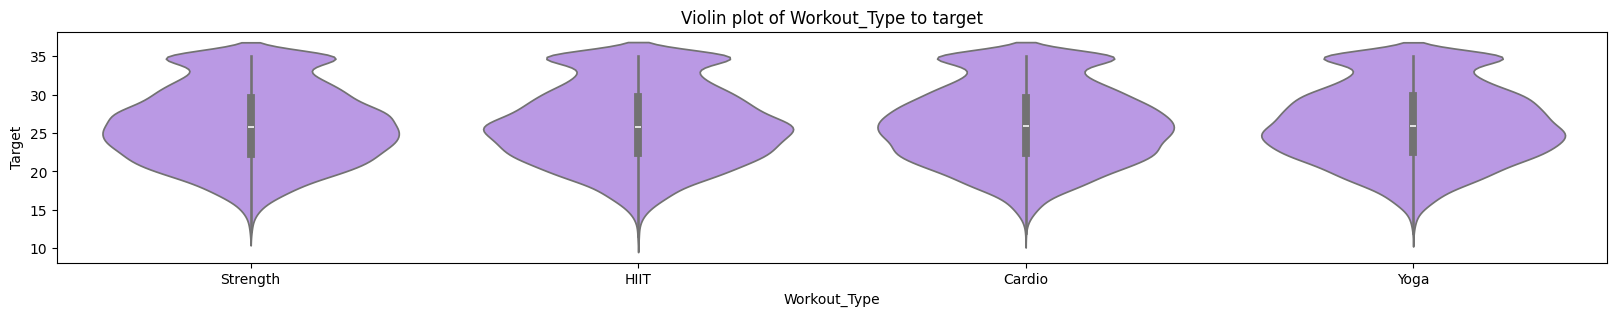

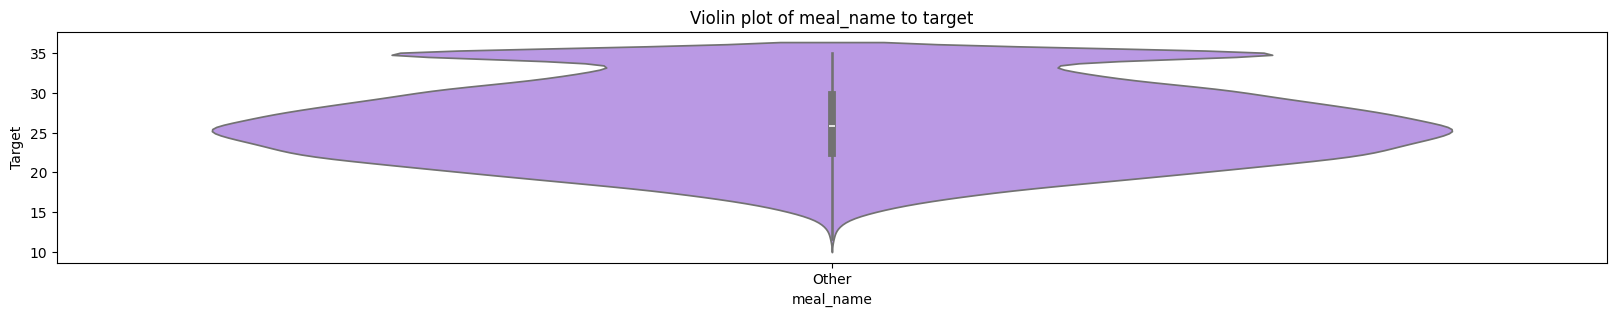

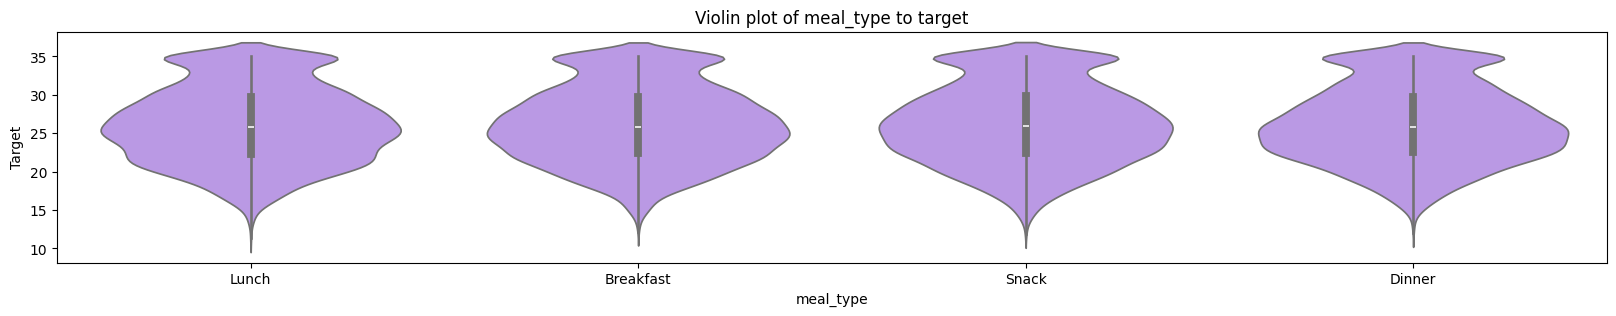

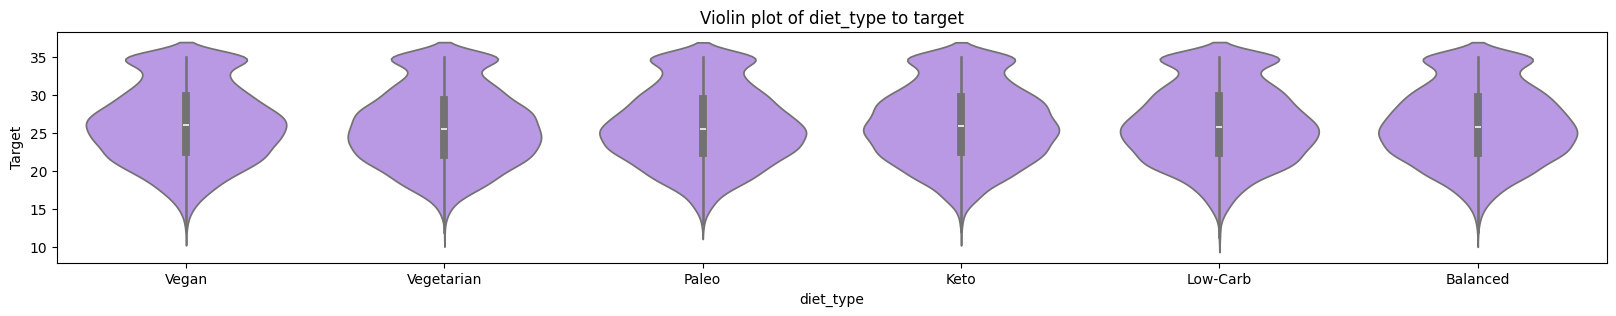

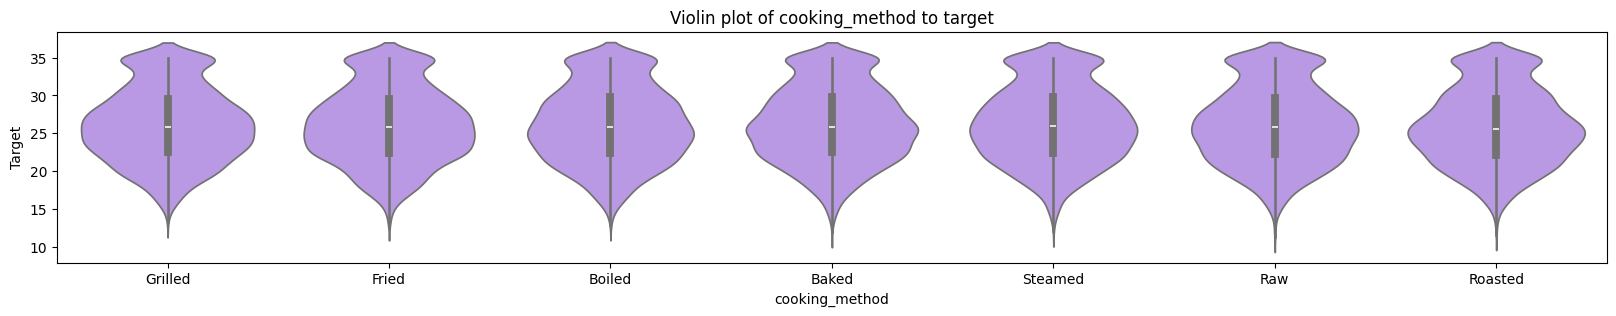

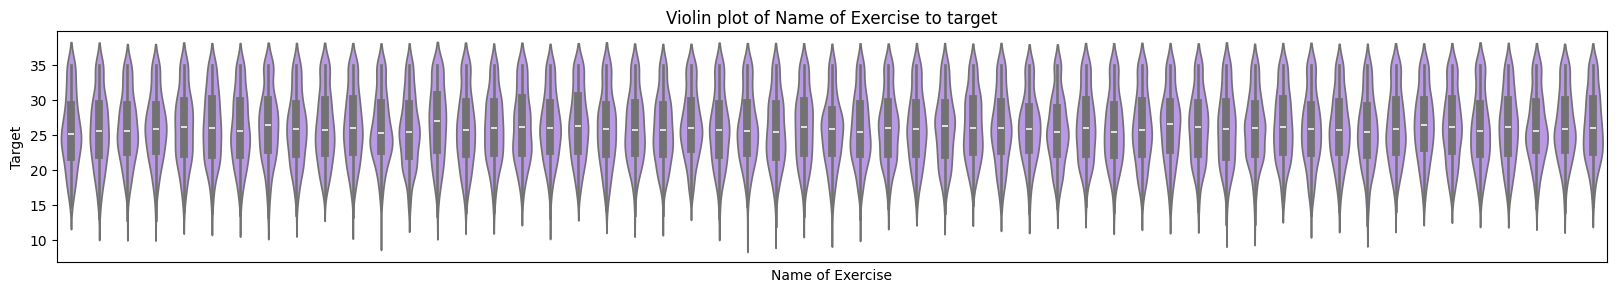

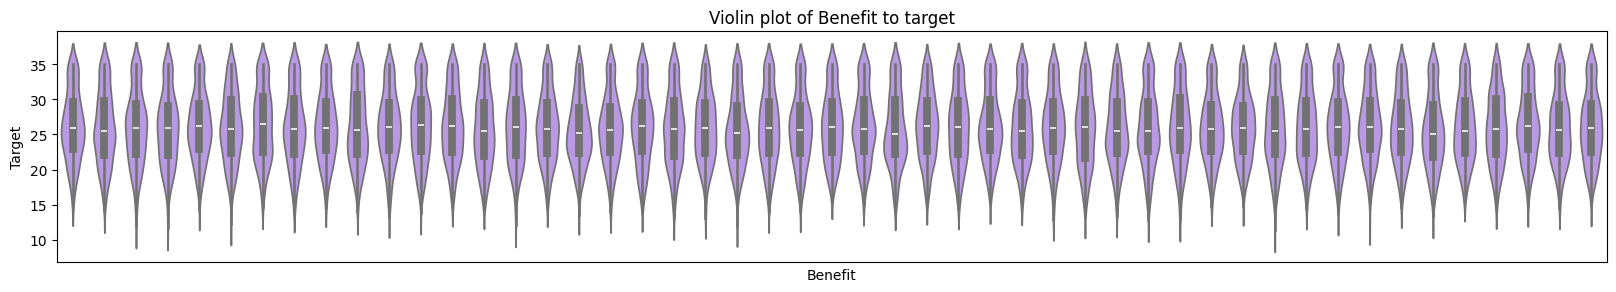

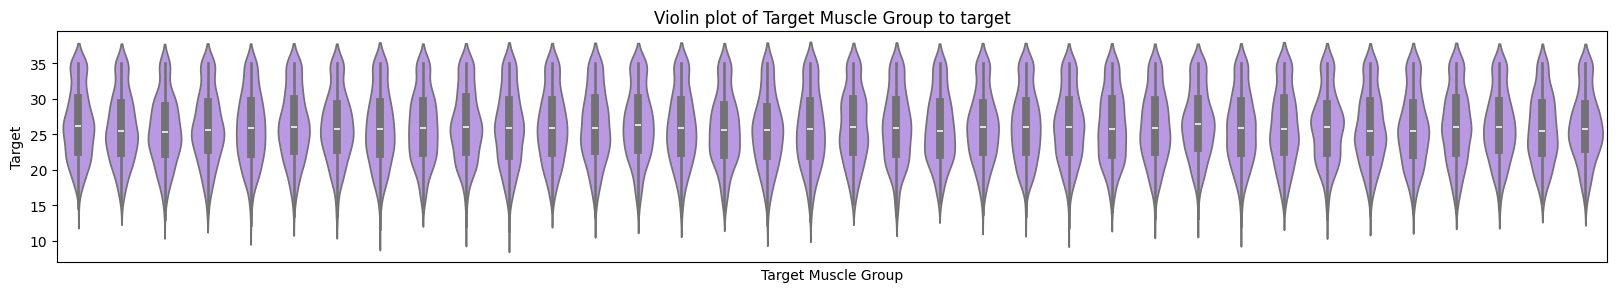

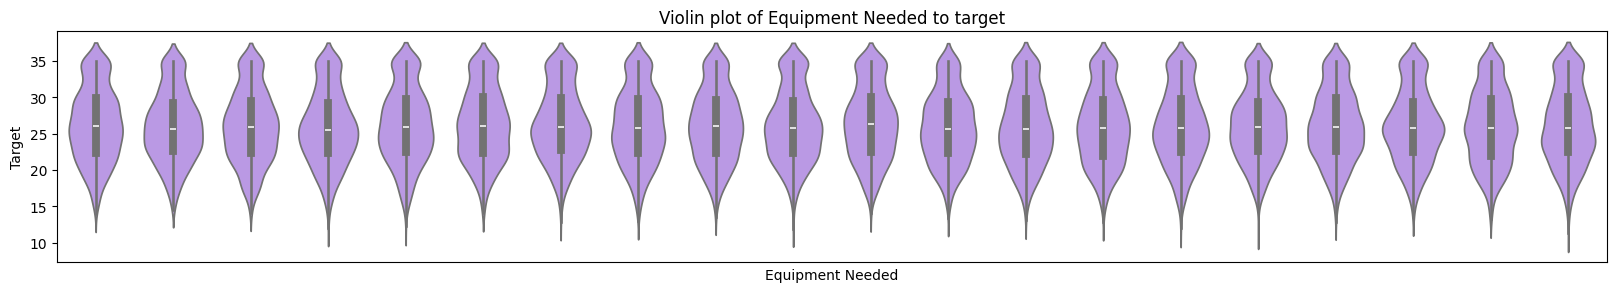

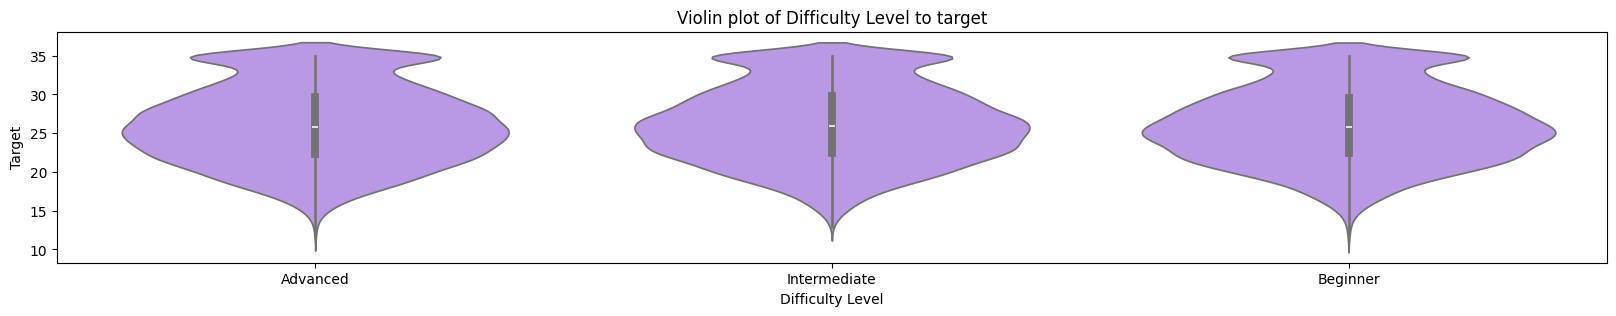

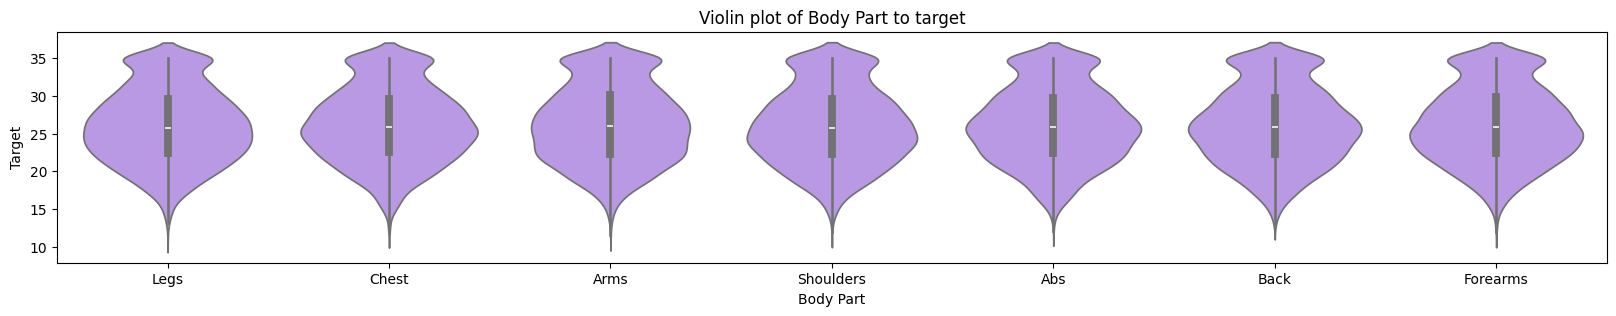

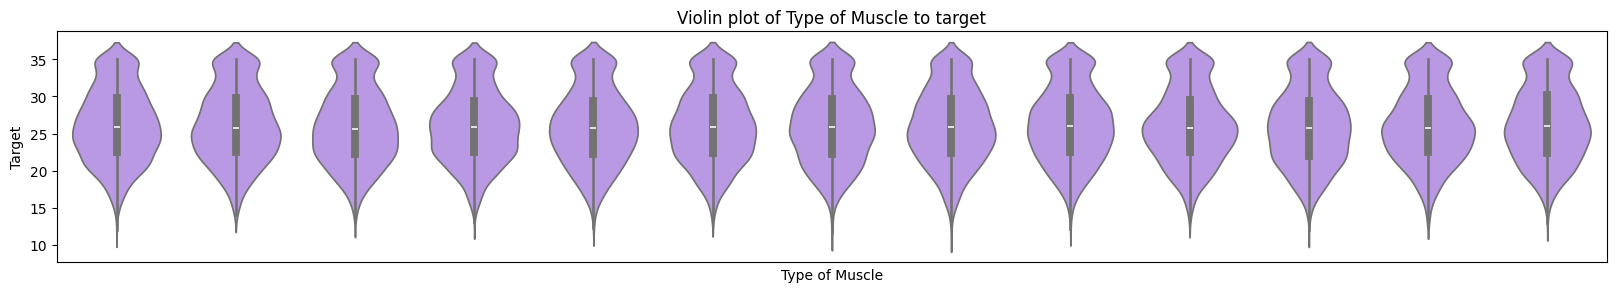

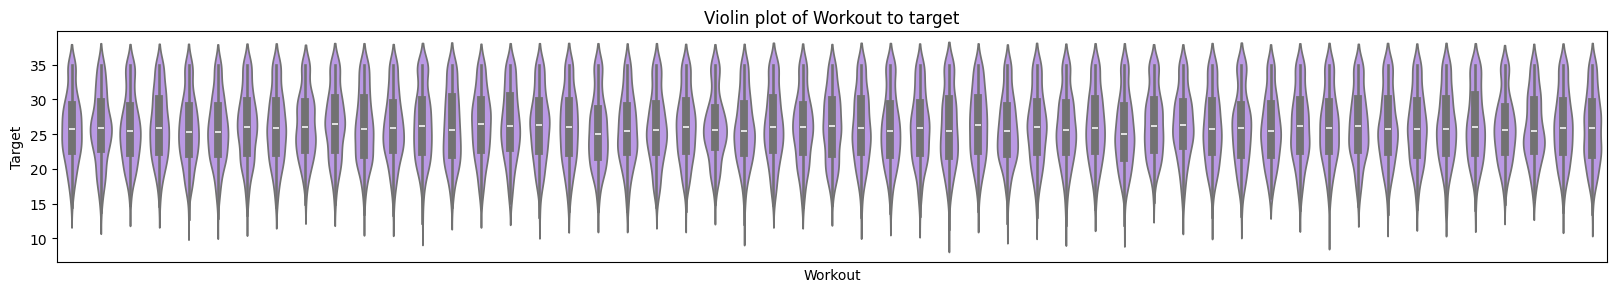

In [19]:
X_cate = X.select_dtypes(include=['object']) 
cate_cols = X_cate.columns
X_cate['Target'] = y
color_1 = '#b88df0'

for col in cate_cols:
    plt.figure(figsize=(20, 3))
    sns.violinplot(data=X_cate, x=col, y='Target', color=color_1)
    plt.title(f'Violin plot of {col} to target')
    if X_cate[col].unique().shape[0] > 8:
        plt.xticks([])
    plt.show()

Với từng biểu đồ, ta thấy phân phối của biến mục tiêu theo từng nhóm của các biến phân loại không có sự khác biệt đáng kể, giá trị trung bình, min và max trong từng nhóm cũng không quá lệch nhau, kể cả hình dạng phân phối cũng gần như nhau.

Điều này chứng tỏ các biến phân loại không ảnh hưởng đến biến mục tiêu.